In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import numpy as np
import seaborn as sns

In [2]:
conda install basemap

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Barry\anaconda3

  added / updated specs:
    - basemap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-1.2.0              |   py37h4e5d7af_0        14.4 MB
    conda-4.8.3                |           py37_0         2.8 MB
    geos-3.6.2                 |       h9ef7328_2         809 KB
    proj4-5.2.0                |       ha925a31_1         3.1 MB
    pyproj-1.9.6               |   py37h6782396_0         233 KB
    pyshp-2.1.0                |             py_0          35 KB
    ------------------------------------------------------------
                            

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


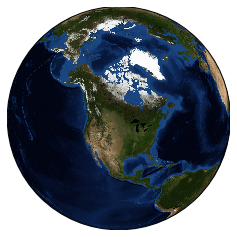

In [8]:
plt.figure(figsize=(4, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

In [9]:
import pandas as pd

In [10]:
data2018 = pd.read_csv ('2018-08.csv')

In [11]:
data2018

,latitude,longitude,date,depth,temperature,salinity,chl_ctd,pc_ctd,cdom_ctd,chl_a676,Unnamed: 10
0,41.3639,-71.4220,2018-08-22 20:05:33.0,4,22.9616,31.3731,3.0008,0.1708,2.2575,6.0672,NaN
1,41.3397,-71.4215,2018-08-22 20:15:34.0,4,22.9605,31.3645,1.4036,0.0000,3.7926,4.5728,NaN
2,41.3143,-71.4218,2018-08-22 20:25:34.0,4,22.8414,31.5827,1.0527,0.0854,9.7975,3.6196,NaN
3,41.2886,-71.4227,2018-08-22 20:35:34.0,4,22.6832,31.8200,0.6050,0.0640,2.5284,2.4087,NaN
4,41.2631,-71.4226,2018-08-22 20:45:34.0,4,22.2266,32.0359,0.6655,0.1067,12.1454,2.2538,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1153,36.6353,-75.0009,2018-08-30 23:09:42.0,4,27.3766,31.0626,0.1210,0.0854,1.1739,1.7724,NaN
1154,36.6121,-75.0006,2018-08-30 23:19:42.0,4,27.3393,31.0169,0.1089,0.0427,1.4448,1.7669,NaN
1155,36.5841,-75.0000,2018-08-30 23:29:42.0,4,27.5079,30.4349,0.1452,0.0427,1.5351,1.8033,NaN
1156,36.5565,-75.0001,2018-08-30 23:39:42.0,4,27.5168,30.4410,0.1452,0.0640,1.4448,1.7968,NaN


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


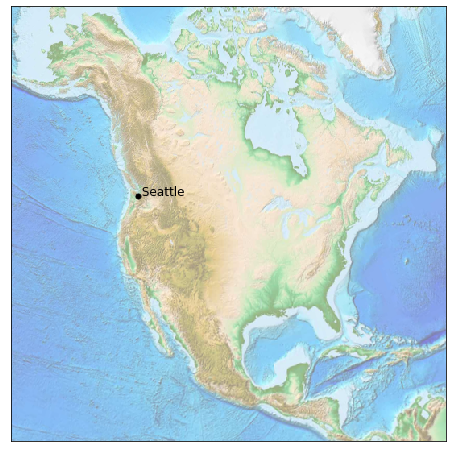

In [12]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [14]:
lat = data2018['latitude']
lon = data2018['longitude'].values
population = data2018['temperature'].values

C:\Users\Barry\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """
C:\Users\Barry\anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\Users\Barry\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


NameError: name 'area' is not defined

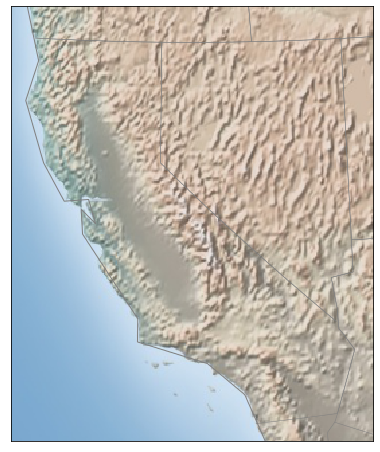

In [17]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='upper right');

In [1]:
#getting datasets prepped for mapping in gis below

In [3]:
df = pd.read_csv ('2019-05.csv')

In [4]:
df

,latitude,longitude,date,depth,temperature,salinity,chl_ctd,pc_ctd,cdom_ctd,chl_a676,Unnamed: 10
0,41.3200,-71.4210,2019-05-22 19:44:59.0,5,13.4309,31.3542,0.3751,0.0640,2.1672,2.1816,NaN
1,41.2825,-71.4210,2019-05-22 19:55:32.0,5,13.1200,31.4493,0.4053,0.1281,1.7609,2.2807,NaN
2,41.2518,-71.4201,2019-05-22 20:05:33.0,5,13.2860,31.4078,0.3267,0.0000,2.7090,2.2342,NaN
3,41.2210,-71.4198,2019-05-22 20:15:33.0,5,13.4242,31.3747,0.4295,0.0854,1.9414,2.1744,NaN
4,41.1905,-71.4210,2019-05-22 20:25:34.0,5,13.1448,31.2637,0.4114,0.0854,2.1221,2.2154,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1081,42.8329,-67.8352,2019-06-02 15:50:31.0,5,9.3813,32.1082,-0.0302,-0.1708,0.5418,3.5555,NaN
1082,42.8492,-67.8325,2019-06-02 16:00:31.0,5,9.2167,32.0965,0.0060,-0.0427,0.2709,4.0580,NaN
1083,42.8787,-67.8265,2019-06-02 16:10:31.0,5,8.9657,31.9422,0.0121,0.0427,0.0000,2.7376,NaN
1084,42.9086,-67.8209,2019-06-02 16:20:31.0,5,9.1003,31.9551,0.0060,0.0427,0.2709,2.4548,NaN


In [5]:
mapready82018 = df.fillna ({
    "chl_ctd": -999999,
    "cdom_ctd": -999999
})
mapready82018

,latitude,longitude,date,depth,temperature,salinity,chl_ctd,pc_ctd,cdom_ctd,chl_a676,Unnamed: 10
0,41.3200,-71.4210,2019-05-22 19:44:59.0,5,13.4309,31.3542,0.3751,0.0640,2.1672,2.1816,NaN
1,41.2825,-71.4210,2019-05-22 19:55:32.0,5,13.1200,31.4493,0.4053,0.1281,1.7609,2.2807,NaN
2,41.2518,-71.4201,2019-05-22 20:05:33.0,5,13.2860,31.4078,0.3267,0.0000,2.7090,2.2342,NaN
3,41.2210,-71.4198,2019-05-22 20:15:33.0,5,13.4242,31.3747,0.4295,0.0854,1.9414,2.1744,NaN
4,41.1905,-71.4210,2019-05-22 20:25:34.0,5,13.1448,31.2637,0.4114,0.0854,2.1221,2.2154,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1081,42.8329,-67.8352,2019-06-02 15:50:31.0,5,9.3813,32.1082,-0.0302,-0.1708,0.5418,3.5555,NaN
1082,42.8492,-67.8325,2019-06-02 16:00:31.0,5,9.2167,32.0965,0.0060,-0.0427,0.2709,4.0580,NaN
1083,42.8787,-67.8265,2019-06-02 16:10:31.0,5,8.9657,31.9422,0.0121,0.0427,0.0000,2.7376,NaN
1084,42.9086,-67.8209,2019-06-02 16:20:31.0,5,9.1003,31.9551,0.0060,0.0427,0.2709,2.4548,NaN


In [6]:
#df.to_csv('file1.csv') for saving dataframes

In [7]:
mapready82018.to_csv('Mready52019.csv')

In [8]:
data82018 = pd.read_csv ('2018-08.csv')
data112018 = pd.read_csv ('2018-11.csv')
data52019 = pd.read_csv ('2019-05.csv')
data102019 = pd.read_csv ('2019-10.csv')

In [9]:
Mready82018 = data82018.fillna ({
    "chl_ctd": -999999,
    "cdom_ctd": -999999
})
Mready82018

,latitude,longitude,date,depth,temperature,salinity,chl_ctd,pc_ctd,cdom_ctd,chl_a676,Unnamed: 10
0,41.3639,-71.4220,2018-08-22 20:05:33.0,4,22.9616,31.3731,3.0008,0.1708,2.2575,6.0672,NaN
1,41.3397,-71.4215,2018-08-22 20:15:34.0,4,22.9605,31.3645,1.4036,0.0000,3.7926,4.5728,NaN
2,41.3143,-71.4218,2018-08-22 20:25:34.0,4,22.8414,31.5827,1.0527,0.0854,9.7975,3.6196,NaN
3,41.2886,-71.4227,2018-08-22 20:35:34.0,4,22.6832,31.8200,0.6050,0.0640,2.5284,2.4087,NaN
4,41.2631,-71.4226,2018-08-22 20:45:34.0,4,22.2266,32.0359,0.6655,0.1067,12.1454,2.2538,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1153,36.6353,-75.0009,2018-08-30 23:09:42.0,4,27.3766,31.0626,0.1210,0.0854,1.1739,1.7724,NaN
1154,36.6121,-75.0006,2018-08-30 23:19:42.0,4,27.3393,31.0169,0.1089,0.0427,1.4448,1.7669,NaN
1155,36.5841,-75.0000,2018-08-30 23:29:42.0,4,27.5079,30.4349,0.1452,0.0427,1.5351,1.8033,NaN
1156,36.5565,-75.0001,2018-08-30 23:39:42.0,4,27.5168,30.4410,0.1452,0.0640,1.4448,1.7968,NaN


In [12]:
Mready112018 = data112018.fillna ({
    "chl_ctd": -999999,
    "cdom_ctd": -999999
})
Mready112018

,latitude,longitude,date,depth,temperature,salinity,chl_ctd,pc_ctd,cdom_ctd,chl_a676,Unnamed: 10
0,38.3239,-74.9778,2018-11-02 00:06:13.0,1,17.2087,30.6084,1.3431,0.0427,3.4314,6.2888,NaN
1,38.2790,-74.9728,2018-11-02 00:25:32.0,1,17.4779,31.2574,1.1374,0.0000,3.0702,5.6533,NaN
2,38.2358,-74.9680,2018-11-02 00:45:33.0,1,17.6528,31.2127,1.6335,0.0854,3.1605,6.3033,NaN
3,38.1949,-74.9632,2018-11-02 01:05:31.0,1,17.8028,31.3520,1.9239,0.0427,3.1605,6.8271,NaN
4,38.1538,-74.9589,2018-11-02 01:25:32.0,1,17.8213,31.4398,2.2506,0.0427,2.7993,7.1962,NaN
...,...,...,...,...,...,...,...,...,...,...,...
534,41.0893,-70.6295,2018-11-12 22:35:49.0,1,13.6963,32.2891,1.7243,0.2135,8.8494,8.3270,NaN
535,41.0987,-70.6260,2018-11-12 22:55:50.0,1,13.6943,32.2897,1.4520,0.2135,8.8042,8.6820,NaN
536,41.1005,-70.6246,2018-11-12 23:15:50.0,1,13.6204,32.2852,1.4157,0.2135,8.1270,8.1618,NaN
537,41.1323,-70.6543,2018-11-12 23:35:50.0,1,13.4292,32.2670,1.8211,0.1708,8.0367,7.3069,NaN


In [13]:
Mready52019 = data52019.fillna ({
    "chl_ctd": -999999,
    "cdom_ctd": -999999
})
Mready52019

,latitude,longitude,date,depth,temperature,salinity,chl_ctd,pc_ctd,cdom_ctd,chl_a676,Unnamed: 10
0,41.3200,-71.4210,2019-05-22 19:44:59.0,5,13.4309,31.3542,0.3751,0.0640,2.1672,2.1816,NaN
1,41.2825,-71.4210,2019-05-22 19:55:32.0,5,13.1200,31.4493,0.4053,0.1281,1.7609,2.2807,NaN
2,41.2518,-71.4201,2019-05-22 20:05:33.0,5,13.2860,31.4078,0.3267,0.0000,2.7090,2.2342,NaN
3,41.2210,-71.4198,2019-05-22 20:15:33.0,5,13.4242,31.3747,0.4295,0.0854,1.9414,2.1744,NaN
4,41.1905,-71.4210,2019-05-22 20:25:34.0,5,13.1448,31.2637,0.4114,0.0854,2.1221,2.2154,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1081,42.8329,-67.8352,2019-06-02 15:50:31.0,5,9.3813,32.1082,-0.0302,-0.1708,0.5418,3.5555,NaN
1082,42.8492,-67.8325,2019-06-02 16:00:31.0,5,9.2167,32.0965,0.0060,-0.0427,0.2709,4.0580,NaN
1083,42.8787,-67.8265,2019-06-02 16:10:31.0,5,8.9657,31.9422,0.0121,0.0427,0.0000,2.7376,NaN
1084,42.9086,-67.8209,2019-06-02 16:20:31.0,5,9.1003,31.9551,0.0060,0.0427,0.2709,2.4548,NaN


In [14]:
Mready102019 = data102019.fillna ({
    "chl_ctd": -999999,
    "cdom_ctd": -999999
})
Mready102019

,latitude,longitude,date,depth,temperature,salinity,chl_ctd,pc_ctd,cdom_ctd,chl_a676,Unnamed: 10
0,41.3292,-71.1729,2019-10-15 20:24:58.0,5,17.7186,31.8836,2.5410,0.8113,23.7489,4.5597,NaN
1,41.3249,-71.1672,2019-10-15 20:34:53.0,5,17.6537,31.8874,2.6681,0.8113,19.4596,4.6249,NaN
2,41.2997,-71.1686,2019-10-15 20:44:51.0,5,17.8079,31.8771,2.6559,0.9394,19.9111,4.4199,NaN
3,41.2734,-71.1696,2019-10-15 20:54:51.0,5,17.7494,31.7902,1.2342,0.7046,20.5884,3.4447,NaN
4,41.2473,-71.1699,2019-10-15 21:04:52.0,5,17.7512,31.7828,2.2869,0.5978,20.4078,3.7170,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2292,42.3794,-70.5205,2019-10-31 23:08:22.0,5,13.9503,31.1131,1.5367,0.0640,2.2575,3.6675,NaN
2293,42.3686,-70.4934,2019-10-31 23:18:22.0,5,13.9832,31.1122,1.5246,0.0427,2.1672,3.5999,NaN
2294,42.3601,-70.4720,2019-10-31 23:28:21.0,5,13.9788,31.1213,1.6577,0.0427,2.3478,3.7858,NaN
2295,42.3606,-70.4732,2019-10-31 23:32:00.0,5,13.2100,31.7740,6.1700,NaN,-999999.0000,NaN,NaN


In [15]:
Mready82018.to_csv('Mready82018.csv')

In [16]:
Mready112018.to_csv('Mready112018.csv')

In [17]:
Mready52019.to_csv('Mready52019.csv')

In [18]:
Mready102019.to_csv('Mready102019.csv')

In [33]:
#start here==============================================================

In [34]:
#start here==============================================================

In [35]:
#start here==============================================================

In [36]:
#start here==============================================================

In [37]:
#start here===============================================================

In [29]:
import netCDF4
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from nco import Nco
nco = Nco()
import sys

In [20]:
sst1tst.variables.keys()

dict_keys(['time', 'longitude', 'latitude', 'sst'])

In [24]:
#ALL MAPPING IS BASED ON THESE!!!!!!!!!

In [3]:
python setup.py install

SyntaxError: invalid syntax (<ipython-input-3-6ea3a7c37725>, line 1)

In [6]:
#the difficulty before came from the installation of netCDF4 so now if you need a directory/program pip install it using the CMD.exe prompt terminal

In [19]:
sst1tst = Dataset('D_20191029-MUR-NESGRID-SST.nc', mode='r')

In [4]:
#lons = fh.variables['lon'][:]
#lats = fh.variables['lat'][:]
#tmax = fh.variables['Tmax'][:]

#tmax_units = fh.variables['Tmax'].units

In [5]:
#ideally this will format the spatial settings of your cdf simmilar to setting a loop before plotting it

In [21]:
lons = sst1tst.variables['longitude'][:]
lats = sst1tst.variables['latitude'][:]
sst = sst1tst.variables['sst'][:]

In [8]:
sst1tst

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Daily level 4 SST data (Multi-Resolution Variatonal Analysis) from the MUR-GHRSST dataset
    Conventions: CF-1.6, COARDS, ACDD-1.3
    Metadata _Conventions: Unidata Dataset Discovery v1.0
    acknowledgement: DOC NOAA Fisheries Northeast Fisheries Science Center Ecosystem Assessment and Dynamics Branch
    institution: DOC NOAA Fisheries Northeast Fisheries Science Center
    creator_type: institution
    creator_name: DOC NOAA Fisheries Northeast Fisheries Science Center Ecosystem Assessment and Dynamics Branch
    creator_url: https://www.nefsc.noaa.gov/
    creator_email: kimberly.hyde@noaa.gov
    publisher_type: institution
    publisher_name: DOC NOAA Fisheries Northeast Fisheries Science Center Ecosystem Assessment and Dynamics Branch
    publisher_url: https://www.nefsc.noaa.gov/
    publisher_email: kimberly.hyde@noaa.gov
    naming_authority: gov.noaa.nefsc
    license: The data

In [9]:
print (sst1tst)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Daily level 4 SST data (Multi-Resolution Variatonal Analysis) from the MUR-GHRSST dataset
    Conventions: CF-1.6, COARDS, ACDD-1.3
    Metadata _Conventions: Unidata Dataset Discovery v1.0
    acknowledgement: DOC NOAA Fisheries Northeast Fisheries Science Center Ecosystem Assessment and Dynamics Branch
    institution: DOC NOAA Fisheries Northeast Fisheries Science Center
    creator_type: institution
    creator_name: DOC NOAA Fisheries Northeast Fisheries Science Center Ecosystem Assessment and Dynamics Branch
    creator_url: https://www.nefsc.noaa.gov/
    creator_email: kimberly.hyde@noaa.gov
    publisher_type: institution
    publisher_name: DOC NOAA Fisheries Northeast Fisheries Science Center Ecosystem Assessment and Dynamics Branch
    publisher_url: https://www.nefsc.noaa.gov/
    publisher_email: kimberly.hyde@noaa.gov
    naming_authority: gov.noaa.nefsc
    license: The data

In [9]:
ncdump('D_20191029-MUR-NESGRID-SST.nc')

NameError: name 'ncdump' is not defined

In [18]:
#here we are starting from the videos instead of the website

In [17]:
sst1tst2 = Dataset('D_20191029-MUR-NESGRID-SST.nc')

In [22]:
lats = sst1tst2.variables['lat'][:]
lons = sst1tst2.variables['lon'][:]
date = sst1tst2.variables['date'][:]

KeyError: 'lat'

In [23]:
#figured out the stuff from before

In [25]:
#mp = Basemap(projection = 'merc',
#            llcrnrlon=
#            llcrnrlat=
#            urcrnrlon=
#            urcrnrlat=
#            resolution = 'i')

In [26]:
lons = sst1tst.variables['longitude'][:]
lats = sst1tst.variables['latitude'][:]
sst = sst1tst.variables['sst'][:]

In [27]:
sst1tst.close()

In [30]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

C:\Users\Barry\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


In [38]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

C:\Users\Barry\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Barry\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


NameError: name 'sst_units' is not defined

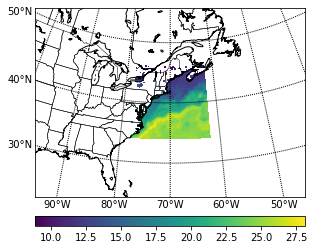

In [40]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(sst))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_units)

# Add Title
plt.title('Surface Temperature')

plt.show()